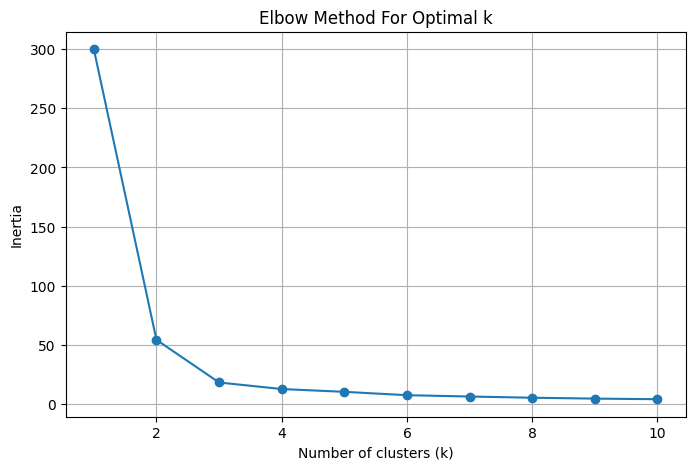

   sepal_length  sepal_width  petal_length  petal_width      species  cluster
0           5.1          3.5           1.4          0.2  Iris-setosa        1
1           4.9          3.0           1.4          0.2  Iris-setosa        1
2           4.7          3.2           1.3          0.2  Iris-setosa        1
3           4.6          3.1           1.5          0.2  Iris-setosa        1
4           5.0          3.6           1.4          0.2  Iris-setosa        1


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the iris dataset
iris_df = pd.read_csv('/content/iris.csv')

# Select only petal length and petal width features
X = iris_df[['petal_length', 'petal_width']]

# Preprocessing: scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Elbow method to find the optimal number of clusters
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow plot
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.grid(True)
plt.show()

# From the elbow plot, choose the optimal k (usually the elbow point, here k=3 for iris)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

# Add cluster labels to the original dataframe
iris_df['cluster'] = kmeans.labels_

# Show the first few rows with clusters
print(iris_df.head())
